In [26]:
# Importing Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from geneticalgorithm import geneticalgorithm as ga

In [27]:
# Fitness func
def fitness_value(params):
    hidden_layer = (int(params[0]),) * int(params[1])
    activation=['identity','logistic','tanh','relu'][int(params[2])]
    solver=['lbfgs','sgd','adam'][int(params[3])]
    model = MLPRegressor(hidden_layer_sizes=hidden_layer,activation=activation,solver=solver)
    model.fit(x_train,y_train)
    fitness = -model.score(x_val,y_val)
    return fitness

In [28]:
# Final nn 
def train_neural_network(params):
    hidden_layer = (int(params[0]),) * int(params[1])
    activation=['identity','logistic','tanh','relu'][int(params[2])]
    solver=['lbfgs','sgd','adam'][int(params[3])]
    model = MLPRegressor(hidden_layer_sizes=hidden_layer,activation=activation,solver=solver)
    model.fit(x_train,y_train)
    validation_error = -model.score(x_val,y_val)
    return validation_error

In [31]:
# Synthetic DS
np.random.seed(2)
num_samples=1000
num_features=5
x = np.random.rand(num_samples,num_features)
true_coefficient = np.random.rand(num_features)*10
noise = np.random.normal(loc=0,scale=1,size=num_samples)
y = np.dot(x,true_coefficient) + noise

In [32]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=3)

 The best solution found:                                                                           
 [11.  5.  0.  1.]

 Objective function:
 -0.921575991300615


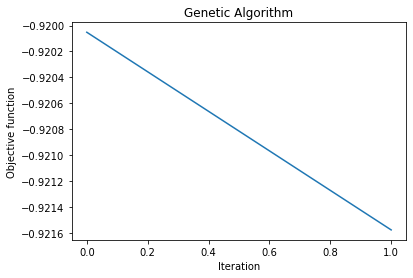

In [33]:
# Config GA
no_of_param =4
varbound = np.array([[5,50],[1,5],[0,3],[0,2]])
algorithm_param = {'max_num_iteration': 1, 'population_size': 100, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': None}
model = ga(function=fitness_value,dimension=no_of_param,variable_type='int',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

# Run GA Model
model.run()

In [34]:
# Retrieve and save best params
best_params=model.output_dict['variable']
validation = train_neural_network(best_params)
print("best parameters found by GA : ",best_params)
print("Valiation error of Neural Network ",validation)

best parameters found by GA :  [11.  5.  0.  1.]
Valiation error of Neural Network  -0.9206817500901473
